## 05 - Cálculo de la Media Anual

Programa para realizar la media anual de todos los boreholes en 
Australia y así minimizar su ruido. Para ello un dato muy importante
es el "logging_date", así calculamos en que año se han estimado las anomalías.

In [1]:
# Librerías para tratamiento de datos
import pandas as pd
import numpy as np
import math

# Librerías para la visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Otras librerías
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Lectura de los dataframes que nos interesan
df = pd.read_csv("../boreholes/dataframe.csv",index_col="Unnamed: 0")
df_mest = pd.read_csv("../resultados/mest/mest.csv")

# Parámetros
tk = list(range(20,520,20))

# Datos interesantes
nombres = list(df.index)
fecha = list(df["Fecha"])
urteak_all = list(range(min(fecha)-500,max(fecha)))

In [3]:
# Creo un dataframe vacio para ir rellenándolo
df_result = pd.DataFrame(index = urteak_all)

In [4]:
# Diccionario con la fecha que le corresponde a cada anomalía
dic = []

for i in range(len(nombres)):
    anom = list(df_mest["{}".format(nombres[i])])
    #Le damos la vuelta por que tambien se la damos a los años
    anom = list(reversed(anom))
    logging_date = fecha[i]
    dates = list(range(logging_date-500,logging_date))
    
    anom_all = []
    for m in anom:
        iterazio = 0
        while (iterazio<20):
            anom_all.append(m)
            iterazio += 1
            
    d = dict(zip(dates,anom_all))
    dic.append(d)

In [5]:
# Crear un dataframe con el diccionario
df_result = pd.DataFrame(dic,index = nombres)
df_result = df_result.transpose()

In [6]:
# Ordeno el índice del dataframe
df_result.sort_index(inplace=True)

In [7]:
# Realizar media regional de los datos para que
# no tengan más peso que otras en el resultado.

#Mt.Isa
df_result["AU_1"] = (df_result["AU_1"]+df_result["AU_12"]+df_result["AU_23"]+df_result["AU_34"]+df_result["AU_43"]+df_result["AU_44"])/6.0

#Bendigo_Station
df_result["AU_3"] = (df_result["AU_3"] + df_result["AU_4"])/2.0

#Bute
df_result["AU_7"] = (df_result["AU_7"] + df_result["AU_8"] + df_result["AU_9"])/3.0

#Kambalda
df_result["AU_20"] = (df_result["AU_20"]+df_result["AU_51"])/2.0

#Norsemal
df_result["AU_27"] = (df_result["AU_27"]+df_result["AU_56"])/2.0

#Tarago
df_result["AU_32"] = (df_result["AU_33"]+df_result["AU_32"])/2.0

#Tennart
df_result["AU_36"] = (df_result["AU_36"]+df_result["AU_37"] + df_result["AU_38"] + df_result["AU_39"])/4.0

#Mt.Wundawa
df_result["AU_46"] = (df_result["AU_46"]+df_result["AU_47"])/2.0

#Portland
df_result["AU_59"] = (df_result["AU_59"]+df_result["AU_58"])/2.0

df_result = df_result.drop(["AU_12","AU_23","AU_34","AU_43","AU_44","AU_4","AU_8","AU_9","AU_51","AU_56","AU_33","AU_37","AU_38","AU_39","AU_47","AU_58"],axis = 1)

In [8]:
# Cálculo de la media 
media = df_result.mean(axis=1,skipna=True)

In [9]:
# Tomo como referencia el dato de anomalía más reciente
media_new=[]
media = list(media)
for i in media:
    media_new.append(i-media[len(media)-1])

Text(0, 0.5, 'Anomalías de Temperatura Estimadas en el Aire')

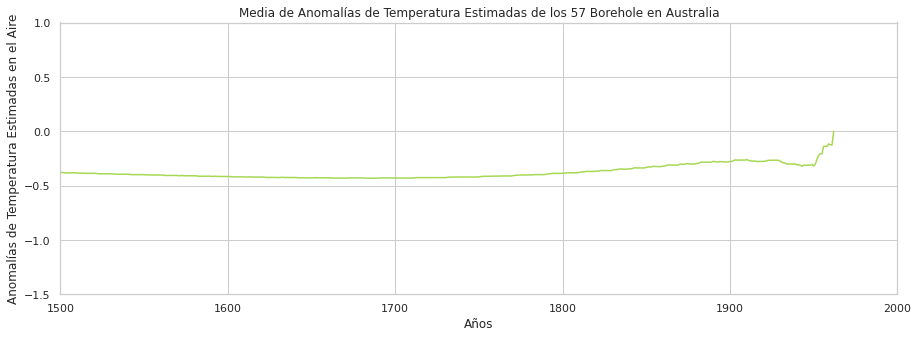

In [10]:
# Plot de la media de anomalías anuales en la superficie de la Tierra
plt.figure(figsize=(15,5))
plt.plot(df_result.index,media_new,color=sns.color_palette('Set2')[4])

plt.ylim(-1.5,1.0)
plt.xlim(1500,2000)
plt.title("Media de Anomalías de Temperatura Estimadas de los 57 Borehole en Australia")
plt.xlabel("Años")
plt.ylabel("Anomalías de Temperatura Estimadas en el Aire")


In [11]:
 np.savetxt(f"../resultados/datos/mest_media.csv",media_new,delimiter=",")

### *Standard Error* de la Media

In [12]:
# Cáculo de el error éstandar como lo definen en el artículo
std_error=[]

for j in range(len(media_new)):
    suma = 0
    for i in media_new[j:]:
        suma = (suma +abs(i)**2)
        
    std_dec = math.sqrt(suma)/(math.sqrt(len(media_new)))
    std_error.append(std_dec)


In [13]:
# Sumar el error estandar a la media
sumar=[]

for i in range(len(media_new)):
    sumar.append(media_new[i]+std_error[i])


# Restar el error estandar a la media
resta=[]

for i in range(len(media_new)):
    resta.append(media_new[i]-std_error[i])

Text(0, 0.5, 'Anomalías de Temperatura')

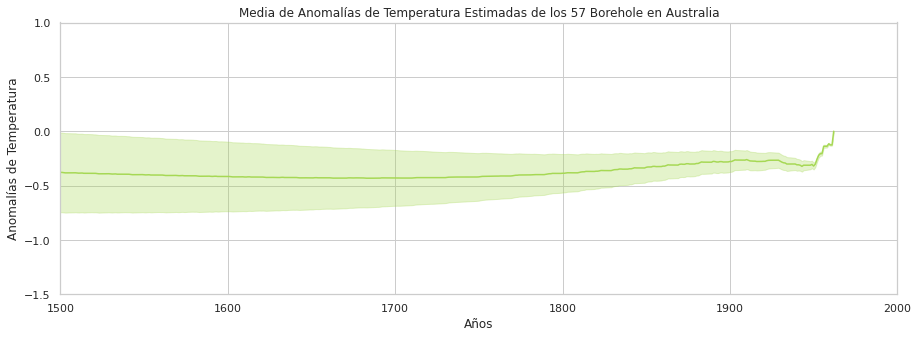

In [14]:
# Plot de la media de anomalías anuales en la superficie de la Tierra con su error estándar
plt.figure(figsize=(15,5))
plt.plot(df_result.index,media_new,color=sns.color_palette('Set2')[4])
plt.fill_between(df_result.index, sumar, resta, alpha = 0.3,color=sns.color_palette('Set2')[4])

plt.ylim(-1.5,1.0)
plt.xlim(1500,2000)
plt.title("Media de Anomalías de Temperatura Estimadas de los 57 Borehole en Australia")
plt.xlabel("Años")
plt.ylabel("Anomalías de Temperatura")

In [15]:
# Guardar el error estandar
np.savetxt(f"../resultados/datos/error_std.csv",std_error,delimiter=",")
